# Exploring the Dataset to understand the data structure and content

In [6]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
from wordcloud import WordCloud
from datasets import load_dataset

In [9]:
# Loading the dataset
dataset = load_dataset("conll2003",split="train")

In [10]:
train_df = pd.DataFrame(dataset)
train_df.head()

,id,tokens,pos_tags,chunk_tags,ner_tags
0,0,"[EU, rejects, German, call, to, boycott, Briti...","[22, 42, 16, 21, 35, 37, 16, 21, 7]","[11, 21, 11, 12, 21, 22, 11, 12, 0]","[3, 0, 7, 0, 0, 0, 7, 0, 0]"
1,1,"[Peter, Blackburn]","[22, 22]","[11, 12]","[1, 2]"
2,2,"[BRUSSELS, 1996-08-22]","[22, 11]","[11, 12]","[5, 0]"
3,3,"[The, European, Commission, said, on, Thursday...","[12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 3...","[11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 1...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ..."
4,4,"[Germany, 's, representative, to, the, Europea...","[22, 27, 21, 35, 12, 22, 22, 27, 16, 21, 22, 2...","[11, 11, 12, 13, 11, 12, 12, 11, 12, 12, 12, 1...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ..."


In [11]:
label_list = dataset.features["ner_tags"].feature.names
print("NER Tags:", label_list)

NER Tags: ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']


In [12]:
df=train_df

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14041 entries, 0 to 14040
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          14041 non-null  object
 1   tokens      14041 non-null  object
 2   pos_tags    14041 non-null  object
 3   chunk_tags  14041 non-null  object
 4   ner_tags    14041 non-null  object
dtypes: object(5)
memory usage: 548.6+ KB


In [14]:
# Printing 5 sample tokens
for i in range(5):
    print(f"Token: {df['tokens'][i]}, Label: {df['ner_tags'][i]}")

Token: ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], Label: [3, 0, 7, 0, 0, 0, 7, 0, 0]
Token: ['Peter', 'Blackburn'], Label: [1, 2]
Token: ['BRUSSELS', '1996-08-22'], Label: [5, 0]
Token: ['The', 'European', 'Commission', 'said', 'on', 'Thursday', 'it', 'disagreed', 'with', 'German', 'advice', 'to', 'consumers', 'to', 'shun', 'British', 'lamb', 'until', 'scientists', 'determine', 'whether', 'mad', 'cow', 'disease', 'can', 'be', 'transmitted', 'to', 'sheep', '.'], Label: [0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Token: ['Germany', "'s", 'representative', 'to', 'the', 'European', 'Union', "'s", 'veterinary', 'committee', 'Werner', 'Zwingmann', 'said', 'on', 'Wednesday', 'consumers', 'should', 'buy', 'sheepmeat', 'from', 'countries', 'other', 'than', 'Britain', 'until', 'the', 'scientific', 'advice', 'was', 'clearer', '.'], Label: [5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,

/tmp/ipykernel_8487/2437765403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=np.concatenate(df['ner_tags'].values), palette='viridis')


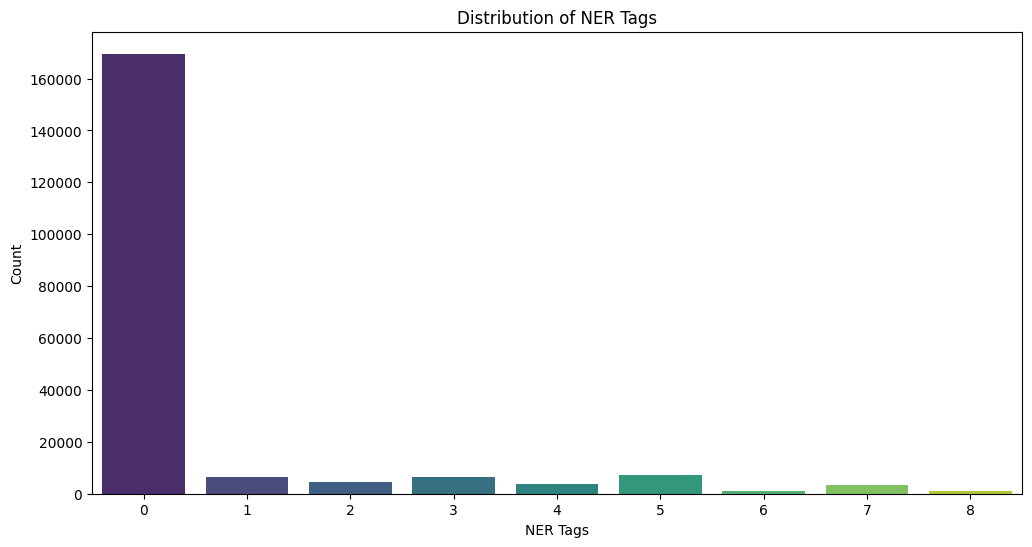

In [17]:
# Plotting the distribution of NER tags
plt.figure(figsize=(12, 6))
sns.countplot(x=np.concatenate(df['ner_tags'].values), palette='viridis')
plt.title('Distribution of NER Tags')
plt.xlabel('NER Tags')
plt.ylabel('Count')
plt.savefig("plots/countplot.png")
plt.show()

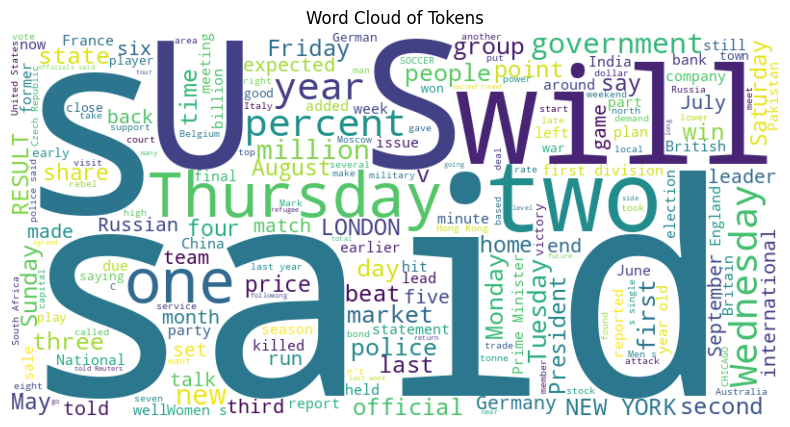

In [16]:
# wordcloud for tokens
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([' '.join(tokens) for tokens in df['tokens']]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tokens')
plt.savefig("plots/wordcloud.png")
plt.show()


In [18]:
label_list = dataset.features["ner_tags"].feature.names
print("NER Tags:", label_list)

NER Tags: ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']
